## Importing the Libraries

In [1]:
import pandas as pd
from statsmodels.tools import tools
import seaborn as sns
from linearmodels import RandomEffects


%matplotlib inline

## Loading the Sales Data

In [2]:
df = pd.read_csv('SalesData.csv')

In [3]:
df.head(2)

,Unnamed: 0,TransNo,TransLine,CustomerNo,Category,SubCategory,TransactionDate,SellPrice,SellQty,COGS,Part
0,0,4515542,4,80000,CAT3002,430,2015-01-02,25.01,0.0,19.899,P140PA780
1,1,4516499,3,80000,CAT3002,430,2015-01-05,25.01,1.0,20.295,P140PA780


- Deleteing the Unnamed Cloumn

In [4]:
df.drop(df.columns[0],axis=1,inplace=True)

In [5]:
df.shape

(2201620, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201620 entries, 0 to 2201619
Data columns (total 10 columns):
TransNo            int64
TransLine          int64
CustomerNo         int64
Category           object
SubCategory        int64
TransactionDate    object
SellPrice          float64
SellQty            float64
COGS               float64
Part               object
dtypes: float64(3), int64(4), object(3)
memory usage: 168.0+ MB


### Calculating the Number of transactions where the Selling Quantity of Product is Negative

In [7]:
df.loc[df['SellQty']<0].count()['TransNo']

33843

### Calculating the Number of transactions where the Selling Price of Product is Negative

In [8]:
df.loc[df['SellPrice']<0].count()['TransNo']

58

### Calculating the Number of transactions where the Cost of Good Sale (COGS) is Negative

In [9]:
df.loc[df['COGS']<0].count()['TransNo']

3

- So, there was 33843, 58 and 3 negative values for Selling Quantity, Selling Price and Cost of Good Sale (COGS) of product.


### Filtering out the Negative Values

In [10]:
df = df.loc[df['SellQty']>0]
df = df.loc[df['SellPrice']>0]
df = df.loc[df['COGS']>0]

### Analysing the TransNo column

In [11]:
df['TransNo'].value_counts()

4701733    518
4616764    501
4946650    409
5149333    381
4859493    374
          ... 
4736836      1
4958008      1
4978482      1
4929322      1
4520095      1
Name: TransNo, Length: 316013, dtype: int64

- The TransNo column has more the 3 lac categories, So it is better if we drop the TransNo Column

### Analysing the Part column

In [12]:
df['Part'].value_counts()

P562PA35589    11783
P9PA32318      10891
P2330PA9482    10869
P380PA11986     9275
P380PA11977     9220
               ...  
P604PA20932        1
P555PA27321        1
P470PA7316         1
P20PA11571         1
P710PA27707        1
Name: Part, Length: 40776, dtype: int64

- The part column has more the 40 thousand categories, So it is better if we drop the Part Column

### Dropping TransNo and Part Column

In [13]:
df.drop(['Part','TransNo'],axis=1,inplace=True)

### Analysing the Category and SubCategory column

In [14]:
df['Category'].value_counts()

CAT2002    503618
CAT3001    402262
CAT2003    236548
CAT3002    177323
CAT3004    159300
CAT4002    153185
CAT4001    130465
CAT4003     90839
CAT2001     52841
CAT3003     46318
CAT4004     26062
CAT3005      8996
CAT1005      1601
CAT0            1
Name: Category, dtype: int64

- There is 14 different Product categories
- CAT0 has only one transaction, So I think it's better to filter out that single row

In [15]:
df = df[df['Category']!='CAT0']

In [16]:
print(df.groupby(['Category','SubCategory'])['SellPrice'].mean())

Category  SubCategory
CAT1005   606            328.064216
CAT2001   431             26.889032
          438             29.512755
          445              7.345922
          489             19.635091
                            ...    
CAT4004   671             91.528703
          676             50.614438
          682             66.751983
          702             14.253125
          724             14.780000
Name: SellPrice, Length: 292, dtype: float64


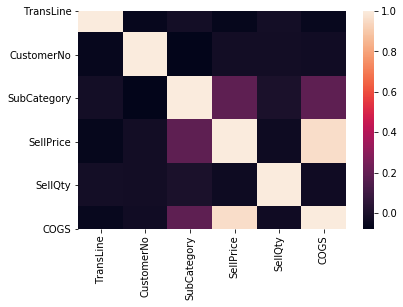

In [17]:
sns.heatmap(df.corr())

- This is the heatmap of the correlation between the column of the sales data 

In [18]:
df['revenue'] = df['COGS']*df['SellQty']

## Saving the Cleaned Data

In [19]:
df.to_csv('saleData_cleaned.csv',index=False)

### Loading the Cleaned Data

In [20]:
data = pd.read_csv('saleData_cleaned.csv')

### Merging the Category and SubCategory to make a unique Category

In [21]:
data['Categories'] = data['Category'].astype(str) + data['SubCategory'].astype(str)
data['Categories'] = pd.Categorical(data['Categories'])

### Slicing the Year from the TranscationDate Column

In [22]:
data['TransactionDate'] = data['TransactionDate'].apply(lambda date: int(date[:-6]))

### Preparing data for the Regression  Model

In [23]:
date = pd.Categorical(data['TransactionDate'])
data = data.set_index(['Categories','TransactionDate'])
data['TransactionDate'] = date

In [24]:
exog_vars = ['SellPrice']
exog = tools.add_constant(data[exog_vars])
mod = RandomEffects(data['COGS'], exog)
re_res = mod.fit()
print(re_res)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                        RandomEffects Estimation Summary                        
Dep. Variable:                   COGS   R-squared:                        0.8755
Estimator:              RandomEffects   R-squared (Between):              0.9711
No. Observations:             1989358   R-squared (Within):               0.8751
Date:                Fri, Dec 06 2019   R-squared (Overall):              0.9002
Time:                        13:51:40   Log-likelihood                -8.171e+06
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   1.399e+07
Entities:                         292   P-value                           0.0000
Avg Obs:                       6812.9   Distribution:               F(1,1989356)
Min Obs:                       1.0000                                           
Max Obs:                    1.815e+05   F-statistic (robust):          1.398e+07
                            

### The overall R-Squared is 0.90.
### Sellprice is signification since it's P-value is 0.00